In [190]:
import numpy as py 
import pandas as pd 

data = pd.read_csv('student-mat.csv',sep=';')
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

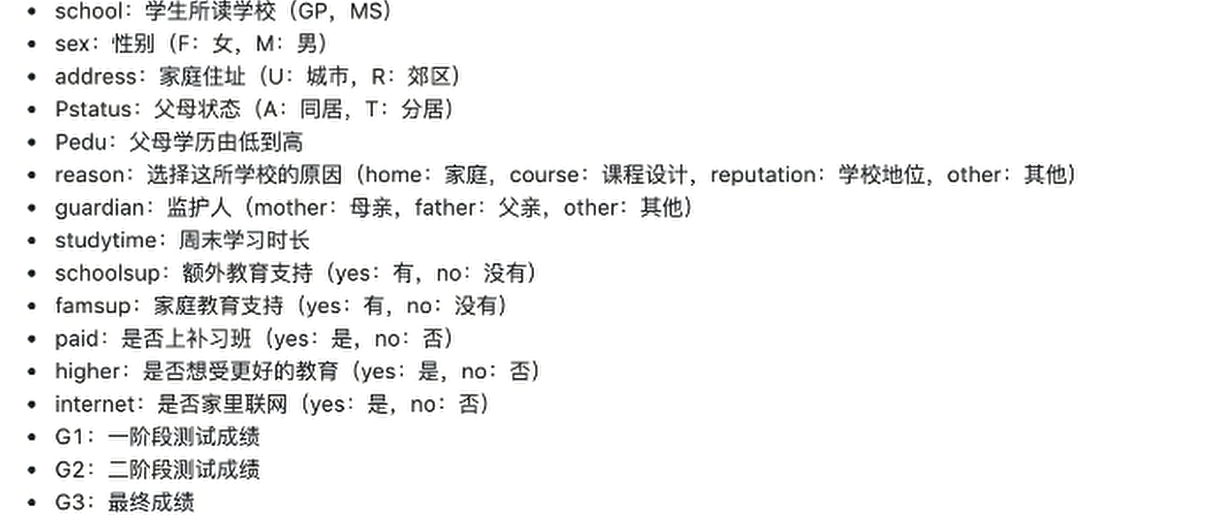

In [191]:
df = data.iloc[:,[0,1,3,5,7,10,11,13,15,16,17,20,21,30,31,32]]
df.head()

,school,sex,address,Pstatus,Fedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4,course,mother,2,yes,no,no,yes,no,5,6,6
1,GP,F,U,T,1,course,father,2,no,yes,no,yes,yes,5,5,6
2,GP,F,U,T,1,other,mother,2,yes,no,yes,yes,yes,7,8,10
3,GP,F,U,T,2,home,mother,3,no,yes,yes,yes,yes,15,14,15
4,GP,F,U,T,3,home,father,2,no,yes,yes,yes,no,6,10,10


In [192]:
df.isnull().sum()

school       0
sex          0
address      0
Pstatus      0
Fedu         0
reason       0
guardian     0
studytime    0
schoolsup    0
famsup       0
paid         0
higher       0
internet     0
G1           0
G2           0
G3           0
dtype: int64

In [193]:
#离散化处理方式①
def choice_2(x): 
    x = int(x)
    if x<5: 
        return '1' 
    elif x >= 5 and x < 10: 
        return "2" 
    elif x >= 10 and x < 15: 
        return "3" 
    else: return "4" 


In [194]:
# 将分数离散化
df['G1'] = pd.Series(map(lambda x:choice_2(x),df['G1']))
df['G2'] = pd.Series(map(lambda x:choice_2(x),df['G2']))
df['G3'] = pd.Series(map(lambda x:choice_2(x),df['G3']))
df.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,school,sex,address,Pstatus,Fedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4,course,mother,2,yes,no,no,yes,no,2,2,2
1,GP,F,U,T,1,course,father,2,no,yes,no,yes,yes,2,2,2
2,GP,F,U,T,1,other,mother,2,yes,no,yes,yes,yes,2,2,3
3,GP,F,U,T,2,home,mother,3,no,yes,yes,yes,yes,4,3,4
4,GP,F,U,T,3,home,father,2,no,yes,yes,yes,no,2,3,3


In [195]:
#离散化处理方式②
df['schoolsup'] = [1 if x=='yes' else 0 for x in df['schoolsup']]
df['famsup'] = [1 if x=='yes' else 0 for x in df['famsup']]
df['paid'] = [1 if x=='yes' else 0 for x in df['paid']]
df['higher'] = [1 if x=='yes' else 0 for x in df['higher']]
df['internet'] = [1 if x=='yes' else 0 for x in df['internet']]
df.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,school,sex,address,Pstatus,Fedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4,course,mother,2,1,0,0,1,0,2,2,2
1,GP,F,U,T,1,course,father,2,0,1,0,1,1,2,2,2
2,GP,F,U,T,1,other,mother,2,1,0,1,1,1,2,2,3
3,GP,F,U,T,2,home,mother,3,0,1,1,1,1,4,3,4
4,GP,F,U,T,3,home,father,2,0,1,1,1,0,2,3,3


In [196]:
#离散化处理方式③
df = pd.get_dummies(df,columns=['school','sex','address','Pstatus','reason','guardian'])
df.head(),df.columns

(   Fedu  studytime  schoolsup  famsup  paid  higher  internet G1 G2 G3  ...  \
 0     4          2          1       0     0       1         0  2  2  2  ...   
 1     1          2          0       1     0       1         1  2  2  2  ...   
 2     1          2          1       0     1       1         1  2  2  3  ...   
 3     2          3          0       1     1       1         1  4  3  4  ...   
 4     3          2          0       1     1       1         0  2  3  3  ...   
 
    address_U  Pstatus_A  Pstatus_T  reason_course  reason_home  reason_other  \
 0          1          1          0              1            0             0   
 1          1          0          1              1            0             0   
 2          1          0          1              0            0             1   
 3          1          0          1              0            1             0   
 4          1          0          1              0            1             0   
 
    reason_reputation  guardia

In [197]:
#分割训练集和测试集
from sklearn.model_selection import train_test_split
y = df['G3']
X = df.drop(['G3'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)
[x.shape for x in [X_train,X_test,y_train,y_test]]

[(276, 24), (119, 24), (276,), (119,)]

In [198]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=34)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7310924369747899

In [199]:
#使用bagging
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=34)
#                      决策树   决策树数量（默认10）   每次取
bc = BaggingClassifier(tree,n_estimators=100,max_samples=1.0,random_state=3)
bc.fit(X_train,y_train)
bc.score(X_test,y_test)
#准确率提高了不少

0.8319327731092437

#bagging tree改进 ---->random forest
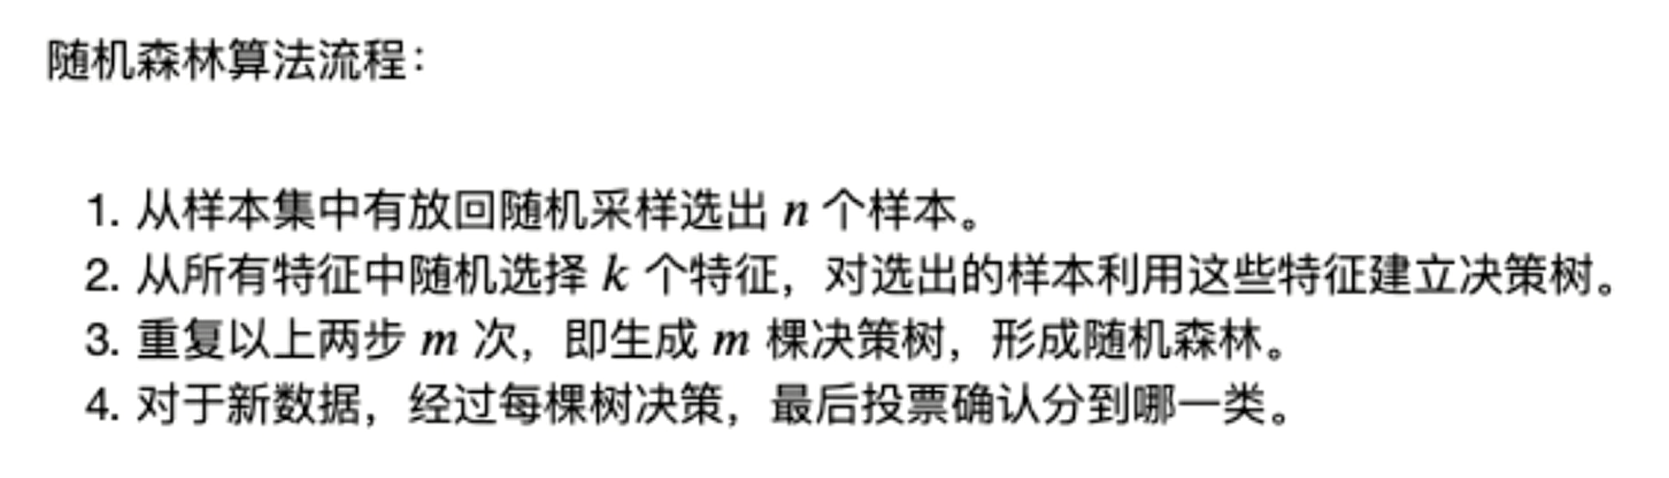

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,max_features=None,criterion='entropy')
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
#差距不多，但样本数量多时，randomforest优势就会体现

0.8403361344537815

In [242]:
#boosting
# 将弱学习器提升成强学习器 
# n_estimators进行一个权衡，当分类器迭代次数较少时，学习率可以小一些，当迭代次数较多时，学习率可以适当放大。
from sklearn.ensemble import AdaBoostClassifier
af = AdaBoostClassifier(n_estimators=10) #默认的分类器时cart树 （使用gini的决策树
af.fit(X_train,y_train)
af.score(X_test,y_test)

0.773109243697479

In [217]:
#gdbt  梯度提升树 使用前向分布算法，弱分类器只能用cart树
from sklearn.ensemble import GradientBoostingClassifier
gf = GradientBoostingClassifier(n_estimators=10,learning_rate=1.0,random_state=33)
gf.fit(X_train,y_train)
gf.score(X_test,y_test)

0.8235294117647058